# Introduction
- This is my first attempt at this problem
- I aim to perform basic eda, and train_sample a RNN on the data

Package imports

In [26]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

Load data

In [73]:
train_logs = pd.read_csv('data/train_logs.csv')
train_scores = pd.read_csv('data/train_scores.csv')

train = train_logs.merge(train_scores, how='left', on='id')
train_sample = train.sample(10000, random_state=0)

test_logs = pd.read_csv('data/test_logs.csv')

EDA

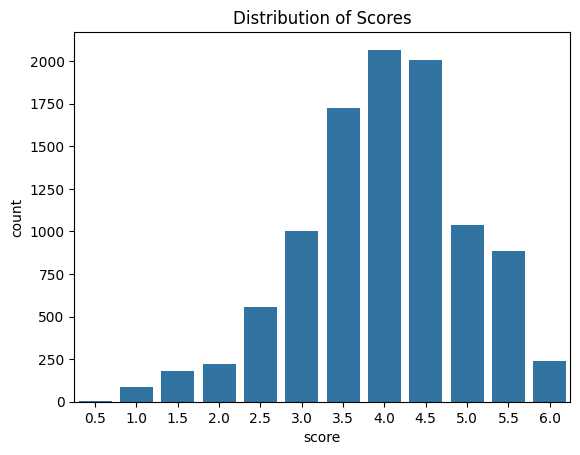

In [14]:
sns.countplot(x='score', data=train_sample)
plt.title('Distribution of Scores')
plt.show()

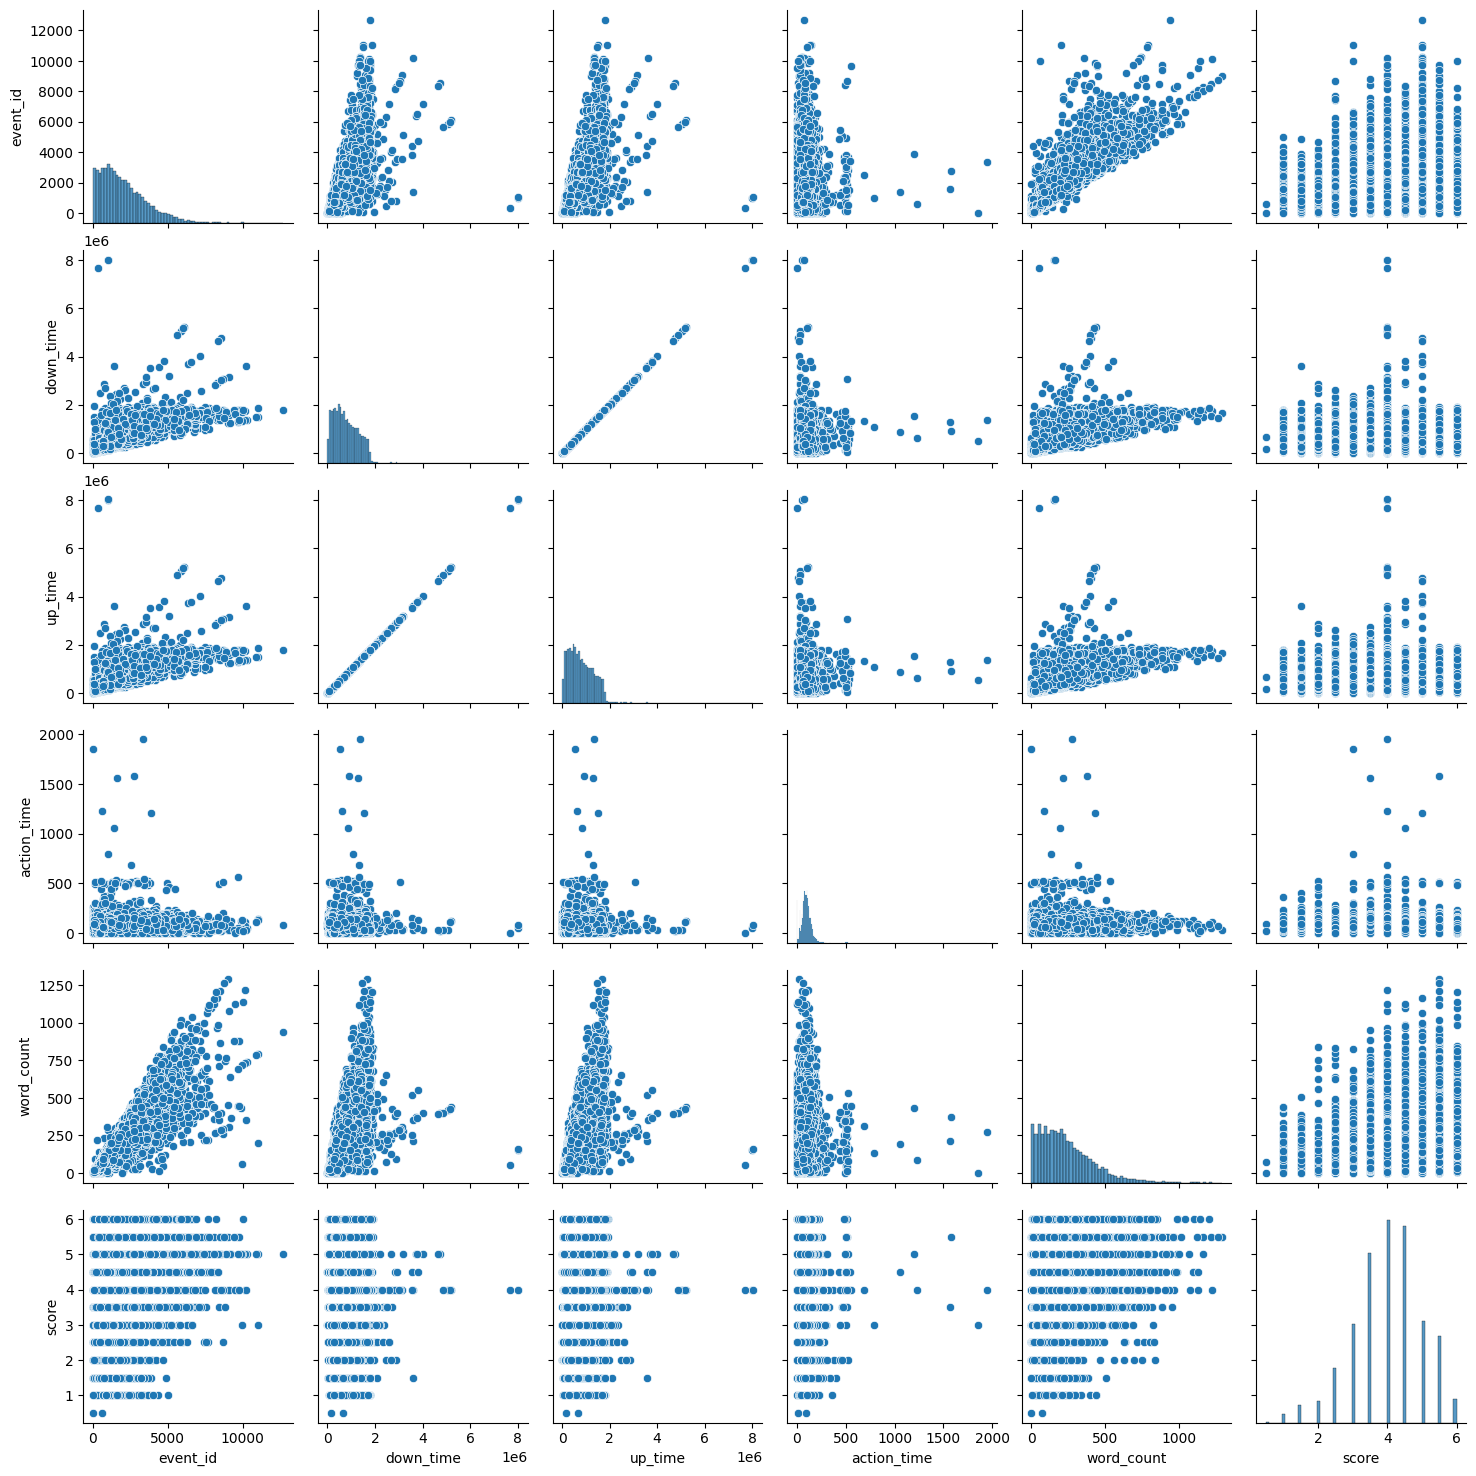

In [15]:

sns.pairplot(train_sample[['event_id', 'down_time', 'up_time', 'action_time', 'word_count', 'score']])
plt.show()

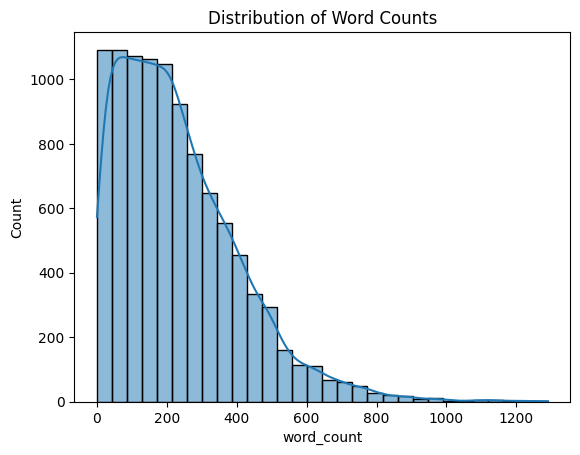

In [16]:

sns.histplot(train_sample['word_count'], bins=30, kde=True)
plt.title('Distribution of Word Counts')
plt.show()

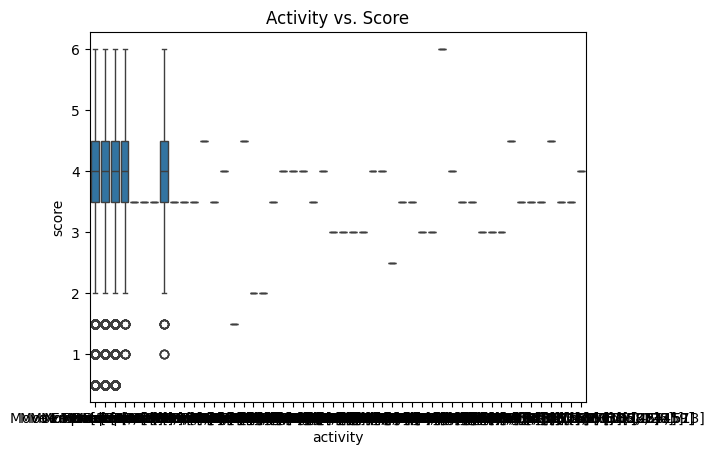

In [17]:

sns.boxplot(x='activity', y='score', data=train)
plt.title('Activity vs. Score')
plt.show()

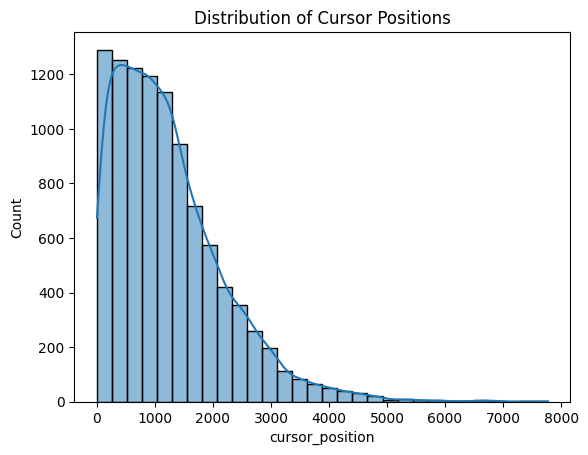

In [18]:

sns.histplot(train_sample['cursor_position'], bins=30, kde=True)
plt.title('Distribution of Cursor Positions')
plt.show()

In [19]:
le = LabelEncoder()
for column in train.columns:
    if train[column].dtype != int:
        train[column] = le.fit_transform(train[column])

In [23]:
train.duplicated().sum()

0

In [24]:
train.isna().sum()

id                 0
event_id           0
down_time          0
up_time            0
action_time        0
activity           0
down_event         0
up_event           0
text_change        0
cursor_position    0
word_count         0
score              0
dtype: int64

Create Datasets

In [75]:
class TrainDataset(torch.utils.data.Dataset):
    def __init__(self, data):
        self.data = list(data.groupby('id').__iter__())
        self.data.drop('id', inplace=True)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, i):
        values = self.data[i][1].values
        return torch.from_numpy(values[:, :-1]).float(), torch.from_numpy(values[:, -1]).float()[:, None]
    
class TestDataset(torch.utils.data.Dataset):
    def __init__(self, data):
        self.data = list(data.groupby('id').__iter__())

    def __len__(self):
        return len(self.data)

    def __getitem__(self, i):
        values = self.data[i][1].values
        return torch.from_numpy(values[:, 1:]).float(), torch.from_numpy(values[:, 1])

Model

In [ ]:
class RNN(nn.Module):
    def __init__(self, seq_len):
        self.